#### FEATURE ENGINERRING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./Data/Real-Data/Real_Combine.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,23.4,30.3,19.0,-,59.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,-,57.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,-,51.0,6.9,2.8,5.4,182.187500
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.287500
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [3]:
#checking for null values
df.isnull().sum()

T         1063
TM        1063
Tm        1063
SLP       1063
H         1063
VV        1063
V         1063
VM        1063
PM 2.5       6
dtype: int64

### T	      :Average Temperature (°C)
### TM	    :Maximum temperature (°C)
### Tm	    :Minimum temperature (°C)
### SLP	    :Atmospheric pressure at sea level (hPa)
### H	      :Average relative humidity (%)
### VV	     :Average visibility (Km)
### V	       :Average wind speed (Km/h)
### VM	     :Maximum sustained wind speed (Km/h)
### PM2.5  :Particulate matter diameter 2.5 micro meters

<AxesSubplot:>

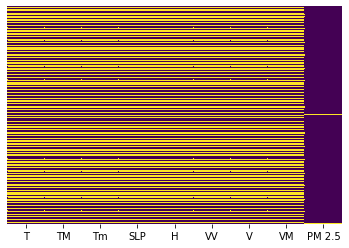

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')

In [5]:
#removed all the null values
df = df.dropna()

<AxesSubplot:>

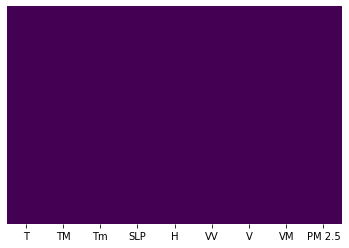

In [6]:
#All null values removed
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')

In [7]:
df.info()#all columns are string type excpet PM2.5

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1122 entries, 0 to 2186
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1122 non-null   object 
 1   TM      1122 non-null   object 
 2   Tm      1122 non-null   object 
 3   SLP     1122 non-null   object 
 4   H       1122 non-null   object 
 5   VV      1122 non-null   object 
 6   V       1122 non-null   object 
 7   VM      1122 non-null   object 
 8   PM 2.5  1122 non-null   float64
dtypes: float64(1), object(8)
memory usage: 87.7+ KB


In [8]:
df.describe() #only one column is float type, rest all are object(string) data type

,PM 2.5
count,1122.000000
mean,109.665987
std,82.689652
min,0.000000
25%,44.791667
50%,84.437500
75%,154.037500
max,404.500000


In [9]:
#replacing the '-' with 0.0 and then converting all columns to float
df = df.replace('-',0.0)
df = df.astype(float)
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,23.4,30.3,19.0,0.0,59.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,0.0,57.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,0.0,51.0,6.9,2.8,5.4,182.187500
6,22.8,30.2,17.6,0.0,55.0,7.7,3.7,7.6,154.037500
7,23.1,30.6,17.4,0.0,46.0,6.9,3.3,5.4,223.208333


In [10]:
df.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,1122.000000,1122.000000,1122.000000,1122.0,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000
mean,23.904724,30.144029,19.559358,0.0,64.569519,6.609180,4.163191,7.488324,109.665987
std,3.156484,4.007013,2.863537,0.0,16.206602,0.909174,2.568628,4.380082,82.689652
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.600000,28.325000,18.500000,0.0,55.000000,6.300000,2.400000,5.400000,44.791667
50%,23.700000,29.900000,20.000000,0.0,67.000000,6.900000,3.700000,7.600000,84.437500
75%,25.300000,32.000000,21.000000,0.0,77.000000,6.900000,5.400000,9.400000,154.037500
max,31.200000,39.200000,25.800000,0.0,97.000000,9.200000,14.800000,51.900000,404.500000


In [11]:
df.to_csv('Real_Combine_1.csv',index = False)

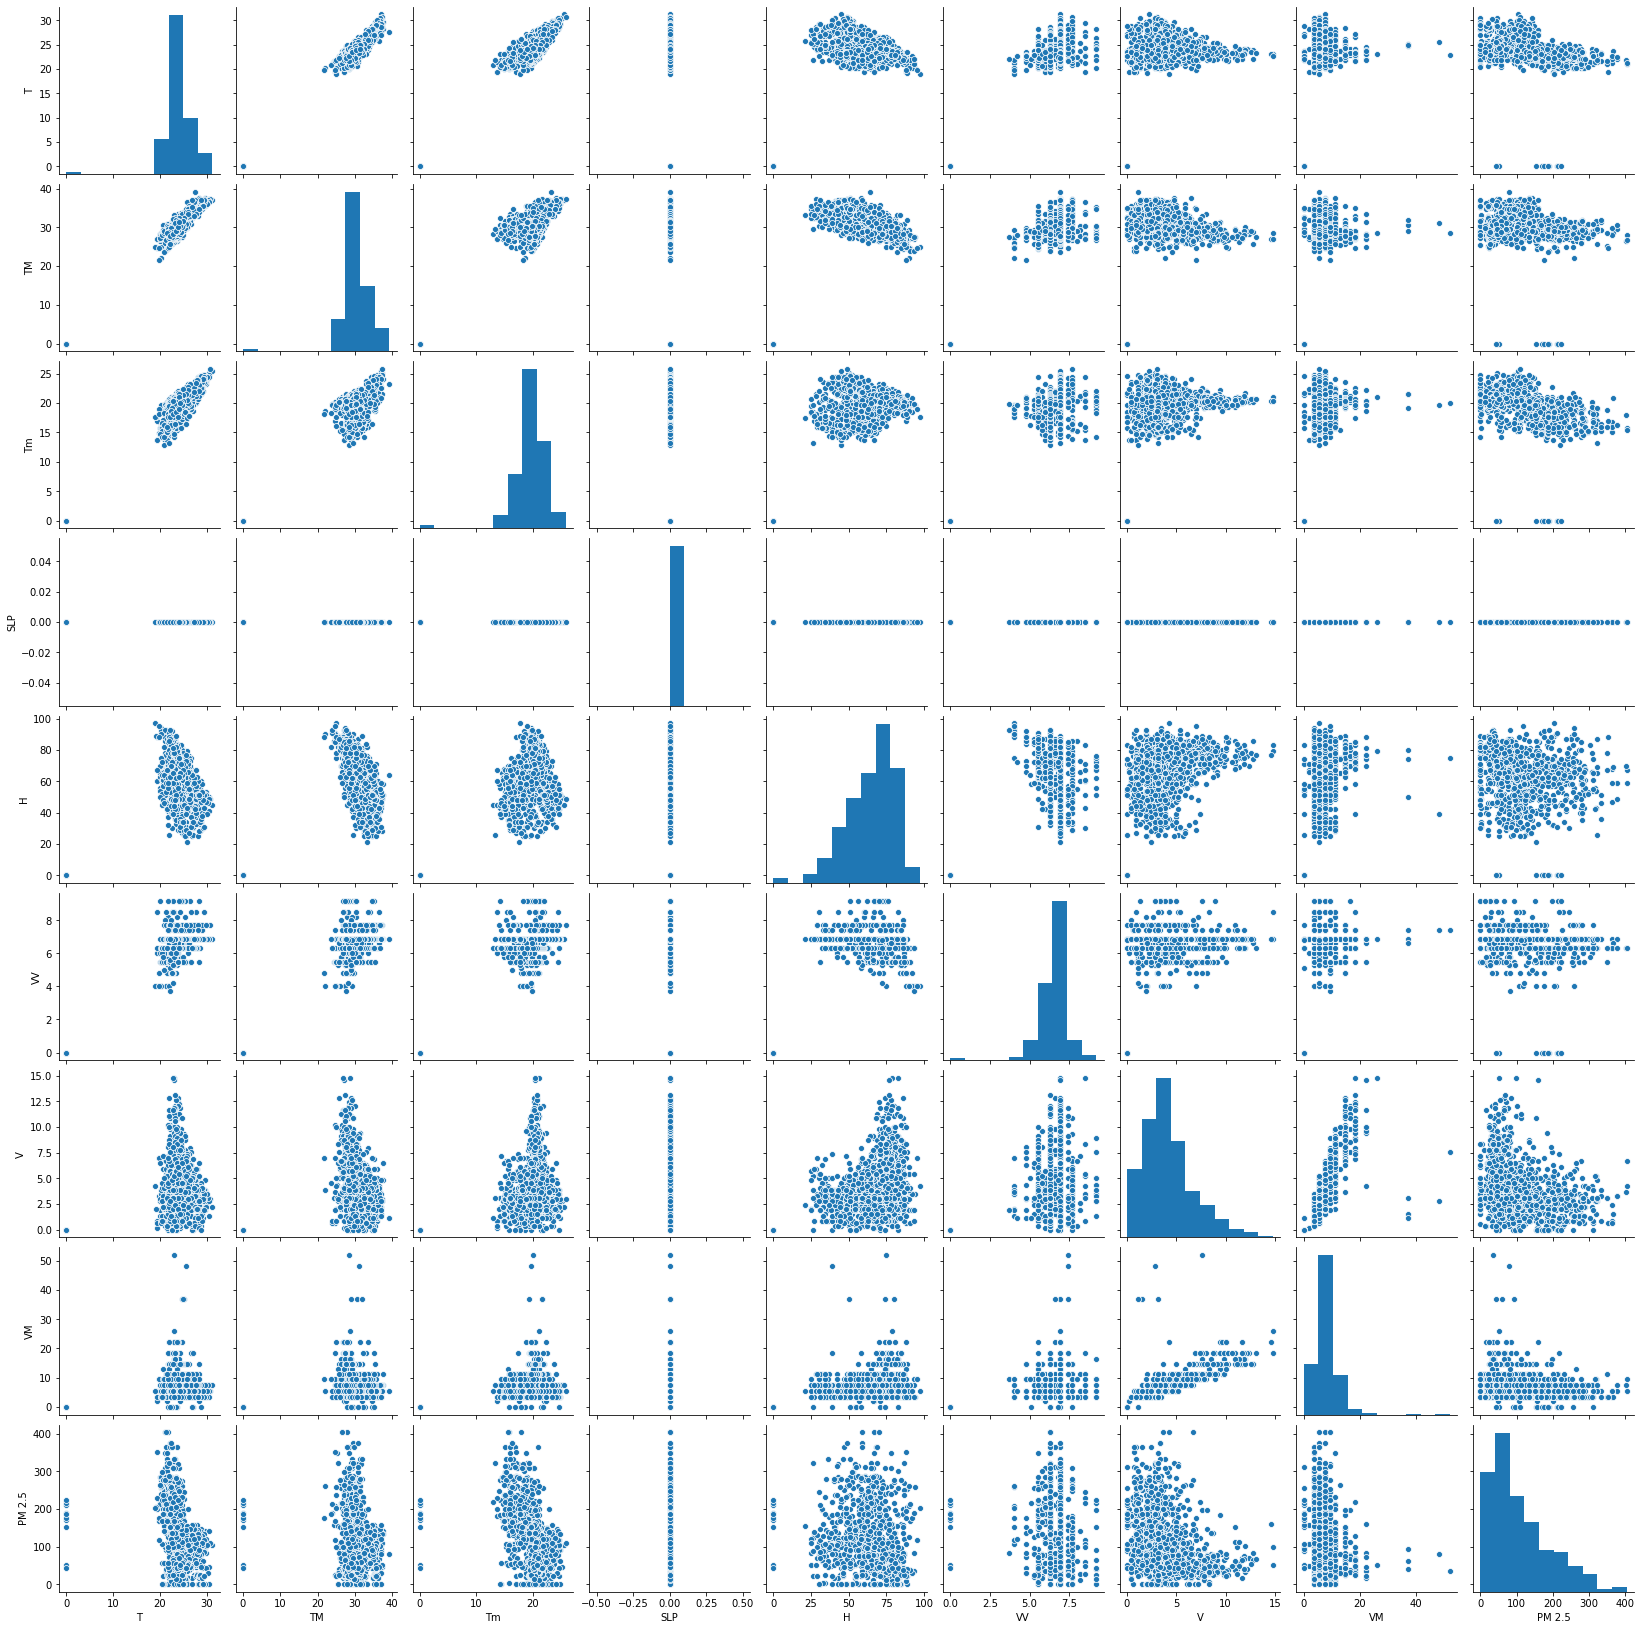

In [11]:
sns.pairplot(df)
plt.show()

#### splitting the data into x and y

In [12]:
x = df.iloc[:,:-1] #independent features
y = df.iloc[:,-1] #dependent features PM2.5

In [13]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.936232,0.864745,NaN,-0.022056,0.660543,0.033043,0.070571,-0.284550
TM,0.936232,1.000000,0.717032,NaN,-0.143885,0.639339,-0.091092,-0.023890,-0.157198
Tm,0.864745,0.717032,1.000000,NaN,0.355173,0.524476,0.222422,0.211280,-0.427378
SLP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H,-0.022056,-0.143885,0.355173,NaN,1.000000,0.076848,0.383969,0.303478,-0.219906
VV,0.660543,0.639339,0.524476,NaN,0.076848,1.000000,0.142893,0.143449,-0.132842
V,0.033043,-0.091092,0.222422,NaN,0.383969,0.142893,1.000000,0.724451,-0.341508
VM,0.070571,-0.023890,0.211280,NaN,0.303478,0.143449,0.724451,1.000000,-0.279926
PM 2.5,-0.284550,-0.157198,-0.427378,NaN,-0.219906,-0.132842,-0.341508,-0.279926,1.000000


<AxesSubplot:>

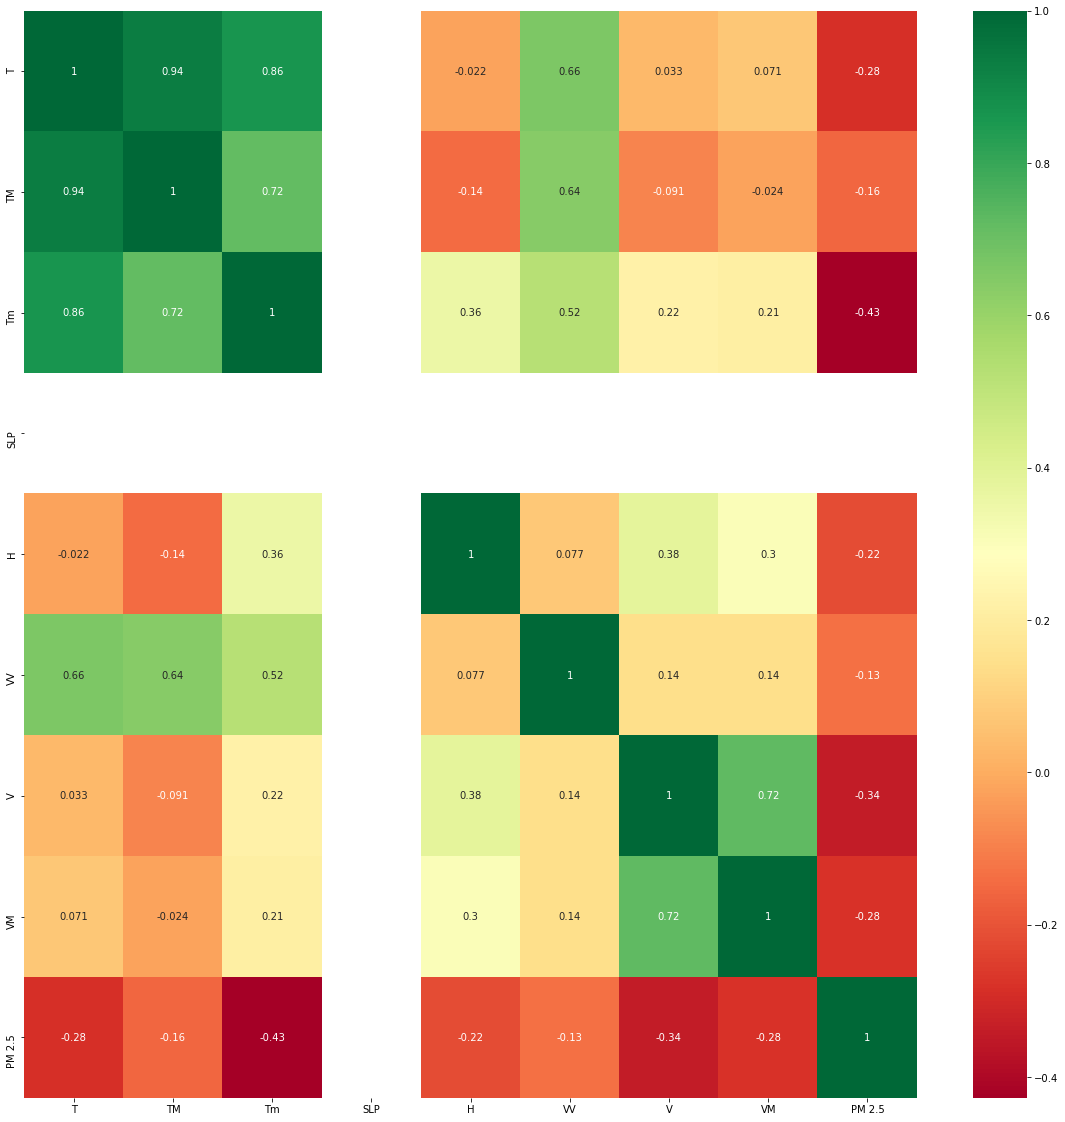

In [14]:
#now creating Correlation with Heat map
c = df.corr()
top_corr_features = c.index
plt.figure(figsize=(20,20))
sns.heatmap(c,annot = True,cmap='RdYlGn')

In [15]:
c.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

#### Feature Importance

In [16]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [17]:
model.feature_importances_

array([0.1903376 , 0.11617597, 0.26881371, 0.        , 0.13513195,
       0.06747524, 0.14993354, 0.07213199])

In [18]:
importance = pd.DataFrame(index=x.columns,data=model.feature_importances_,columns=['Features'])
importance.sort_values('Features',ascending = False)

,Features
Tm,0.268814
T,0.190338
V,0.149934
H,0.135132
TM,0.116176
VM,0.072132
VV,0.067475
SLP,0.000000


<AxesSubplot:xlabel='PM 2.5'>

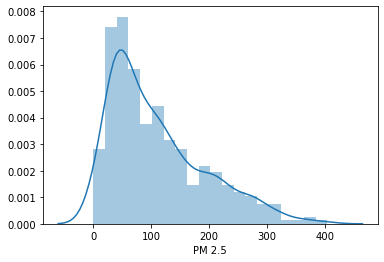

In [19]:
sns.distplot(y)#It is right skewed

#### Train test split

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [21]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [22]:
linear.score(X_train,y_train)#wrt train data very bad R-squared score

0.2819536815252799

In [23]:
linear.score(X_test,y_test)#wrt test data -very bad R-squared  score

0.2557109224781694

In [24]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(linear,x,y,cv=5)

In [25]:
score.mean()#Still very bad R-squared  score

0.15310708640429402

In [26]:
#finding the coefficient of all the independent features
linear.coef_

array([-4.88856592e+00,  6.89362727e+00, -1.52986945e+01,  5.32907052e-15,
        4.34290302e-01,  6.51114073e+00, -7.12371587e+00, -3.95486602e-01])

#### Model Evaluation

In [27]:
coefficient = pd.DataFrame(index=x.columns,data=linear.coef_,columns=['Coefficients(slopes)'])
coefficient.sort_values('Coefficients(slopes)',ascending = False)

,Coefficients(slopes)
TM,6.893627e+00
VV,6.511141e+00
H,4.342903e-01
SLP,5.329071e-15
VM,-3.954866e-01
T,-4.888566e+00
V,-7.123716e+00
Tm,-1.529869e+01


#### Interpretaion of coefficients: 
#### Holding all other features fixed, 1 unit increase in 'T' is associated with an increase of 6.893 in 'PM2.5'.

In [28]:
prediction = linear.predict(X_test)

<AxesSubplot:xlabel='PM 2.5'>

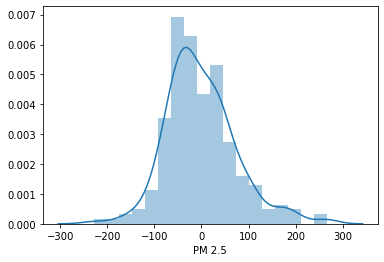

In [29]:
sns.distplot(y_test-prediction)

#### Regression Evaluation Metrics

In [30]:
from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test,prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 56.90813482516149
MSE 5466.906794674755
RMSE 73.93853389589731


In [31]:
import pickle
file = open('regression_model.pkl','wb')
pickle.dump(linear,file)